## Helpful links
follow this (signal processing portion): https://app.box.com/file/1283099900531

signal filtering in matlab: https://www.mathworks.com/help/dsp/ug/cochlear-implant-speech-processor.html

Python toolbox: https://github.com/jabeim/AB-Generic-Python-Toolbox/blob/master/Documentation%20__draft__v0.1.docx

Google research code: https://gitlab.ilabt.imec.be/ahadifar/google-research/-/tree/master/cochlear_implant

python librosa library 

frequencies gotten from: https://ncbi.nlm.nih.gov/pmc/articles/PMC4386730/

paper on mimicking the human ear https://ecs.utdallas.edu/loizou/cimplants/tutorial/introci.pdf

rms energy https://www.analyticsvidhya.com/blog/2022/05/comparison-of-the-rms-energy-and-the-amplitude-envelope/

construct sinusoid https://stackoverflow.com/questions/48043004/how-do-i-generate-a-sine-wave-using-python

adding noise https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

spectrogram https://www.pnsn.org/spectrograms/what-is-a-spectrogram

plot spectogram https://stackoverflow.com/questions/48598994/scipy-signal-spectrogram-compared-to-matplotlib-pyplot-specgram

frame (2ms) overlap https://stackoverflow.com/questions/66887965/python-audio-segmentation-with-overlapping-and-hamming-windows

speech intelligibility: https://colab.research.google.com/drive/1bAnDpUUx5-BYkL3l3ukNVVnsLzEhy-ds#scrollTo=Nz7MiXRIxiEK

normalize volume: https://stackoverflow.com/questions/42492246/how-to-normalize-the-volume-of-an-audio-file-in-python

reverb in python: https://www.youtube.com/watch?v=q63ypxds0cY, https://stackoverflow.com/questions/58345278/how-to-add-a-ratio-parameter-to-scipy-signal-convolution-in-python , https://stackoverflow.com/questions/48006003/reverb-effect-with-scipy

understand reverb with convolution: https://gormatevosyan.com/convolutional-reverb-how-and-why-does-it-work/

rt60, c50: https://www.acousticbulletin.com/room-acoustic-descriptors-rt-c50-and-gain/

simulate room acoustics: https://colab.research.google.com/drive/1V_t3Eq-Ue_5Tqs3LWFx36qf0zt_2p0xW#scrollTo=-dwC_jd1mb8f, https://www.youtube.com/watch?v=c3DTtc--_F4 

In [53]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math

In [54]:
# frequencies gotten from: https://ncbi.nlm.nih.gov/pmc/articles/PMC4386730/
FREQUENCIES_FOR_5_CHANNELS_TABLE_1 = [350, 607, 1053,1827,3170, 8700]
FREQUENCIES_FOR_16_CHANNELS_TABLE_1 = [250, 416, 494, 587, 697, 828, 983, 1168, 1387, 1648, 1958, 2326, 2762, 3281, 3898, 4630, 8700]
FREQUENCIES_FOR_6_CHANNELS_TABLE_2 = [188, 563, 1063, 1813, 2938, 4813, 7938]
FREQUENCIES_FOR_22_CHANNELS_TABLE_2 = [188, 313, 438, 563, 688, 813, 938, 1063, 1188, 1438, 1688, 1938, 2313, 2688, 3188, 3688, 4313, 5603, 5938, 6938, 7938]

In [55]:
wav_file = "CU300111.wav" #"LL-Q1860_(eng)-Vealhurl-cosmos2.wav"
frequency_ranges = FREQUENCIES_FOR_22_CHANNELS_TABLE_2 ### CHANGE THIS TO which you want
LEN_TIME_QUANTIZED_MS = 8
OVERLAP_MS = 6

In [56]:
# Load sample data from a WAV file
sample_rate, data = scipy.io.wavfile.read(wav_file)
times = np.arange(len(data))/sample_rate
# data = sum(data.T) # if data is a 2d array (with two channels) 
print(data.shape)

print("sample_rate:", str(sample_rate) + " samples/sec")

(42147,)
sample_rate: 16000 samples/sec


In [57]:
def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

In [58]:
'''
the rms energy values will be the amplitude of the sinusoid over 8ms
the frequency of the 8ms should be the average frequency in that range.
'''

def create_sinusoid(average_frequency, amplitude, t):
    '''
    average_frequency (int): should be the average frequency of that channel
    t (int): should be the time of the generated sound in seconds
    sample_rate (int): should be the sample rate of the audio file
    sample_rate (float): should be the amplitude of the sound, in this case the rms energy value
    ''' 
    f = average_frequency

    samples = np.linspace(0, t, int(sample_rate*t), endpoint=False)

    signal = np.sin(2 * np.pi * f * samples)

    signal *= amplitude # ?? should multiply by the rms energy

    return signal

# Simulate CI Audio Processing Pipeline

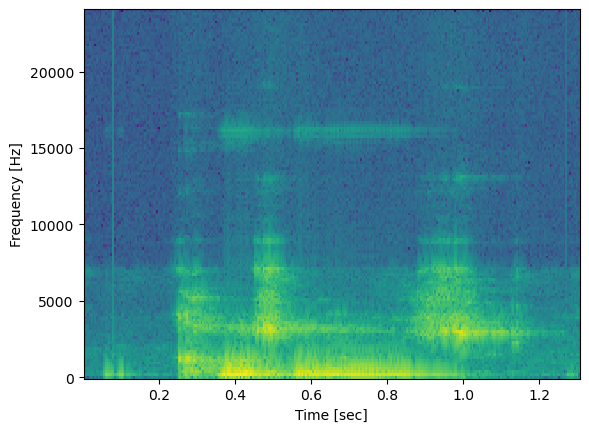

In [47]:
spectrogram_data = scipy.signal.spectrogram(data, sample_rate)

f, t, Sxx = scipy.signal.spectrogram(data, sample_rate)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [48]:
data.shape

(62848,)

In [49]:
# bandpass the data
bandpassed_frequencies_low_to_high = []

for indx in range(0, len(frequency_ranges)-1):
    low, high = frequency_ranges[indx], frequency_ranges[indx+1]
    bandpassed_frequencies_low_to_high.append(bandpass(data, [low, high], sample_rate))

In [50]:
bandpassed_frequencies_low_to_high

[array([-4.74346464e+00, -4.64401966e+00, -4.53836793e+00, ...,
         6.08224040e-04,  5.09503487e-04,  4.24380813e-04]),
 array([ 8.34663330e-01,  6.89568707e-01,  5.42036796e-01, ...,
        -3.97720852e-04, -3.43344052e-04, -2.94693595e-04]),
 array([-0.16602585, -0.30227482, -0.43772093, ...,  0.00094355,
         0.00082206,  0.00071155]),
 array([ 1.43981263e+00,  1.38554094e+00,  1.32248872e+00, ...,
        -1.43648959e-04, -1.32031774e-04, -1.20163565e-04]),
 array([-9.90630776e-01, -1.08047331e+00, -1.16021764e+00, ...,
        -2.72005261e-05, -2.53236828e-05, -2.32764077e-05]),
 array([ 6.71323894e-01,  6.19404173e-01,  5.58901023e-01, ...,
        -1.04236671e-04, -1.08559730e-04, -1.09426395e-04]),
 array([-7.31698044e-01, -8.83182963e-01, -1.02139768e+00, ...,
         1.65179231e-05,  1.50633071e-06, -1.07389019e-05]),
 array([7.90806840e-01, 9.97023415e-01, 1.18293867e+00, ...,
        1.37367917e-04, 6.63394816e-05, 7.28632364e-06]),
 array([-1.0029614 , -0.683185

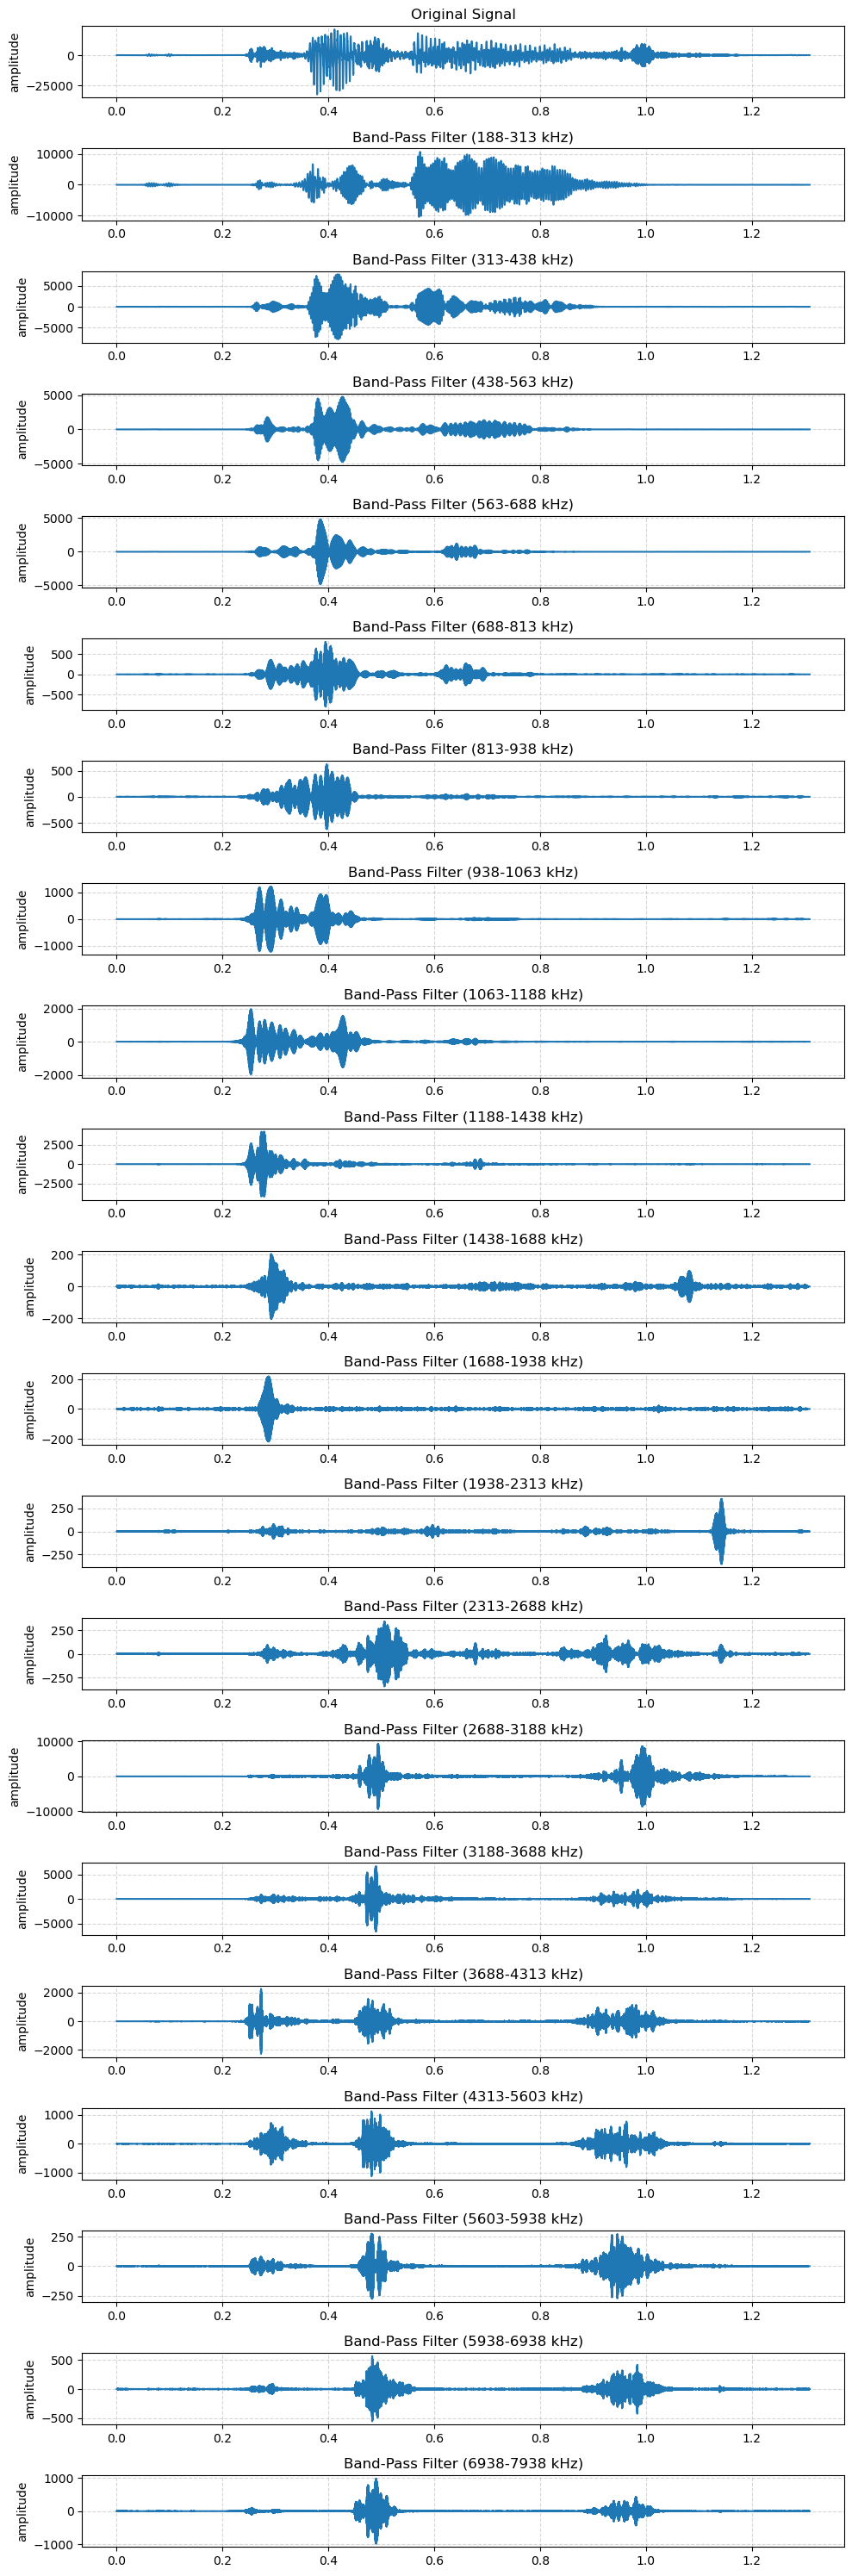

In [51]:
# display result Bandpassed
fig, axes = plt.subplots(len(bandpassed_frequencies_low_to_high)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data) # plot entire graph
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet

# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Band-Pass Filter ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times, bandpassed_frequencies_low_to_high[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()

plt.show()

In [52]:
# rectify/get the envelope of each channel
enveloped_frequencies_low_to_high = []
for indx in range(len(bandpassed_frequencies_low_to_high)):
    enveloped_frequencies_low_to_high.append(np.abs(bandpassed_frequencies_low_to_high[indx]))

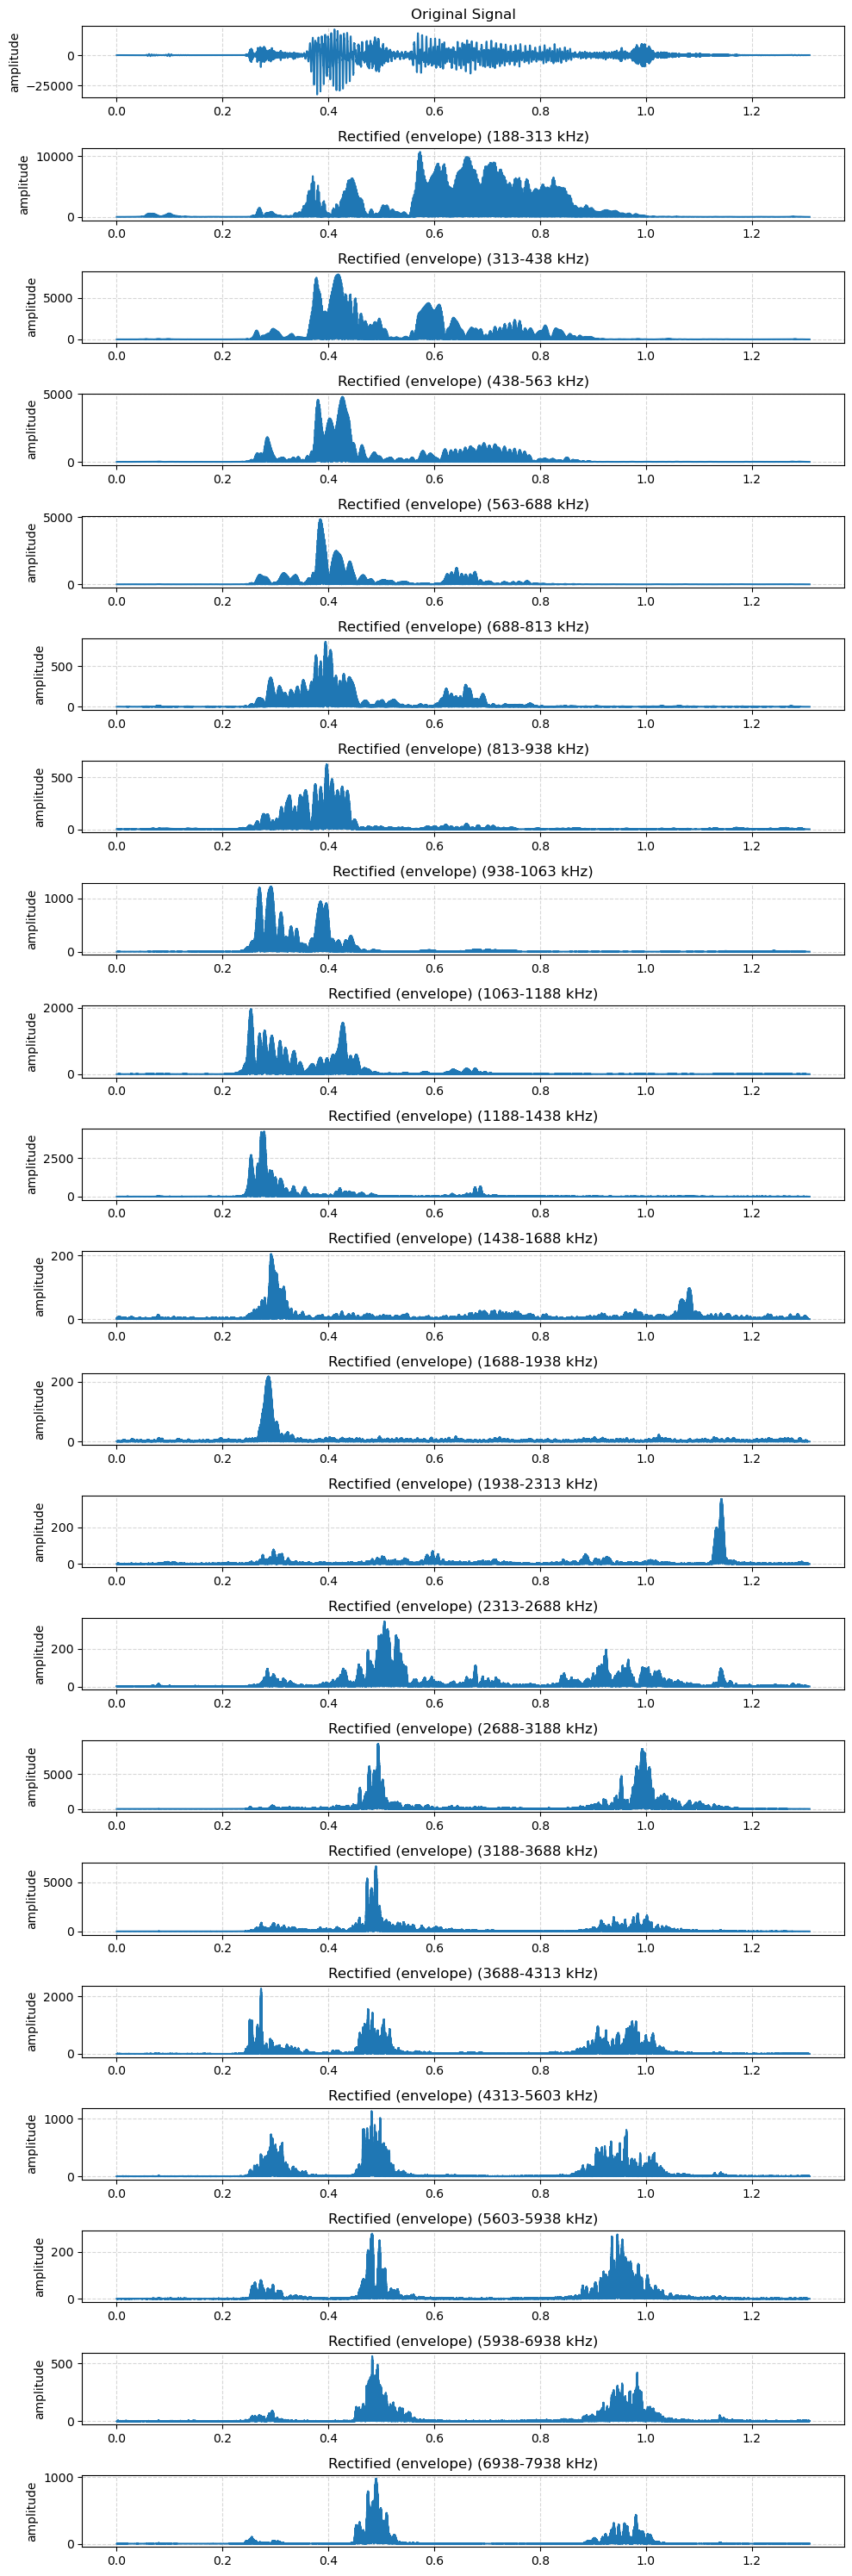

In [53]:
# display result Rectified
fig, axes = plt.subplots(len(enveloped_frequencies_low_to_high)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data)
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Rectified (envelope) ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times, enveloped_frequencies_low_to_high[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

In [54]:
# got rms energy with overlap, LEN_TIME_QUANTIZED_MS=8ms i.e. if overlap is 2ms, calculate rms energy for 8 ms at 0s, 2s, 4s, 6s, 8s, ...
# get rms every 8 ms, construct a sinusoid with amplitude = rms energy and frequency = average of the bandpass filter
# sample rate = 48000/s or 384 per 8 ms
# TIP: make sure to use a zero phase filter as a parameter in the bandpass filter
if OVERLAP_MS == 0 or OVERLAP_MS > LEN_TIME_QUANTIZED_MS:
    OVERLAP_MS = LEN_TIME_QUANTIZED_MS

rms_energy_values = []

frame_step = int((sample_rate/1000)*LEN_TIME_QUANTIZED_MS) # the number of values equal to LEN_TIME_QUANTIZED_MS milliseconds. this should give an integer
overlap_step = int((sample_rate/1000)*OVERLAP_MS) # the number of values equal to the millisecond overlap

for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(frequencies[indx:final_indx]**2)))
        indx += overlap_step
        final_indx += overlap_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))

In [55]:
len(rms_energy_values[0])

218

In [62]:
rms_energy_values

[array([6.10590000e+00, 4.22374586e+00, 4.77530796e+00, 4.44648029e+00,
        8.83037508e+00, 1.43608931e+01, 2.99591462e+01, 5.04240805e+01,
        1.29680603e+02, 3.49868633e+02, 3.90374566e+02, 3.58286597e+02,
        2.51645408e+02, 1.07545662e+02, 1.63584502e+02, 3.04752866e+02,
        3.85052861e+02, 2.64976561e+02, 1.29580691e+02, 7.96417185e+01,
        4.38305701e+01, 4.47996329e+01, 3.33659164e+01, 1.66363072e+01,
        2.24602919e+01, 1.15823388e+01, 8.19934574e+00, 1.15901714e+01,
        1.55687867e+01, 1.97708268e+01, 1.83596727e+01, 1.86526392e+01,
        1.22831868e+01, 5.81156449e+00, 8.45722246e+00, 1.35090430e+01,
        9.37150374e+00, 1.06008298e+01, 7.41745542e+00, 6.52851816e+00,
        1.13153768e+01, 3.13401539e+01, 1.30851281e+02, 3.31267619e+02,
        9.00181108e+02, 7.09944432e+02, 3.29753417e+02, 5.05544183e+02,
        5.78576583e+02, 3.87830323e+02, 2.04202658e+02, 1.41658179e+02,
        8.49200298e+01, 1.09515821e+02, 1.11874571e+02, 3.121491

In [57]:
# generate sinusoid (represents current?)
signal = []

for indx in range(len(frequency_ranges)-1):
    output = []
    min_frequency = frequency_ranges[indx]
    max_frequency = frequency_ranges[indx+1]
    average_frequency = (min_frequency+max_frequency)/2
    ## TODO HERE: get every 8 seconds and its amplitude
    for amplitude in rms_energy_values[indx][:-1]: # do this until the final frame which may not be the max frame length
        output.extend(create_sinusoid(average_frequency, amplitude, OVERLAP_MS/1000))
    output.extend(create_sinusoid(average_frequency, amplitude, (final_frame_length/frame_step)*LEN_TIME_QUANTIZED_MS/1000)) # process the final frame which may not be the max frame length 
    signal.append(np.array(output))
    

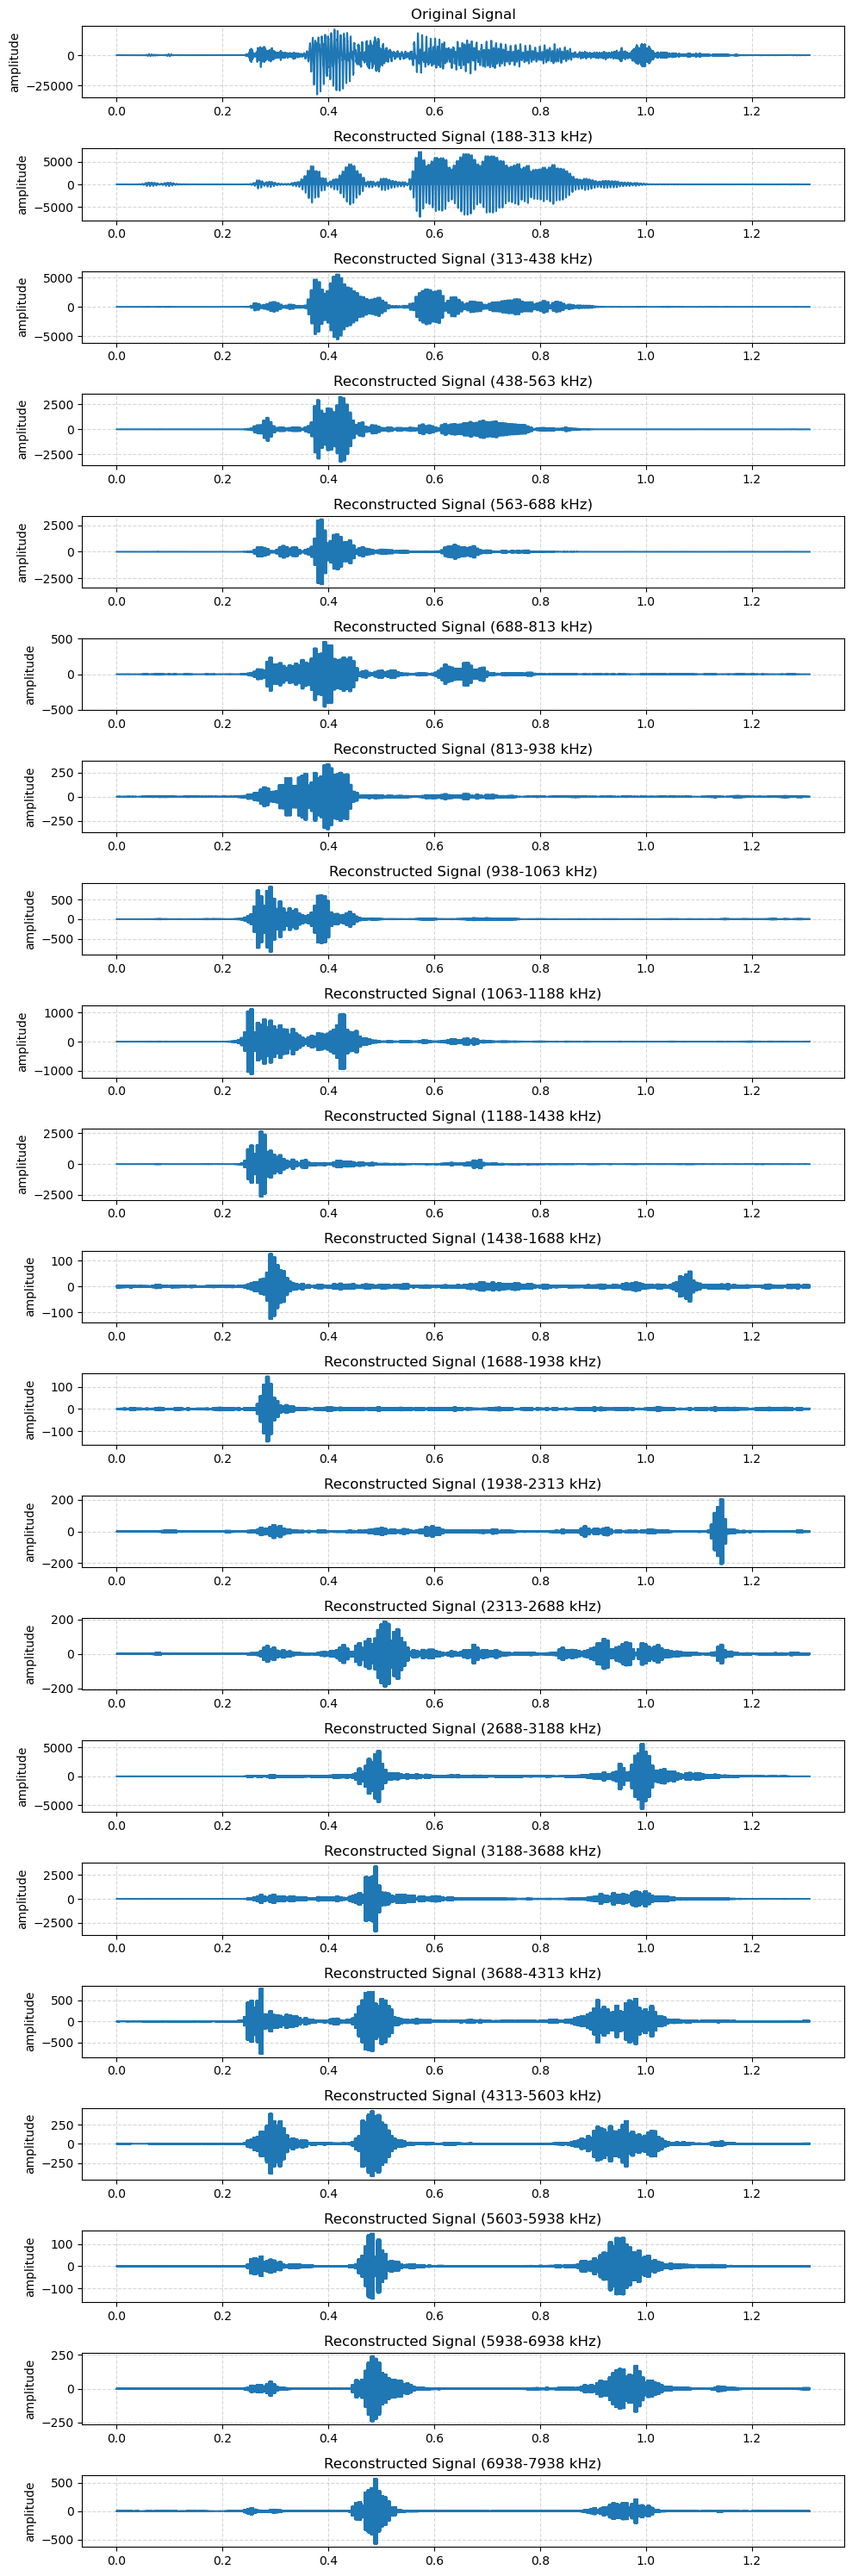

In [58]:
# plot sinusoid (reconstructed sound)
times_reconstructed = np.arange(len(signal[0]))/sample_rate
fig, axes = plt.subplots(len(signal)+1, figsize=(10, 30))
axes[0].set_title("Original Signal")
axes[0].grid(alpha=.5, ls='--')
axes[0].plot(times, data)
axes[0].set_ylabel('amplitude')
# axes[0].set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
# ax1.margins(.1, .1)
indx = 0
for ax in axes[1:]:
    low,high = frequency_ranges[indx], frequency_ranges[indx+1]
    ax.set_title(f"Reconstructed Signal ({low}-{high} kHz)")
    ax.grid(alpha=.5, ls='--')
    ax.plot(times_reconstructed, signal[indx])
    ax.set_ylabel('amplitude')
#     ax.set_xbound(lower=0.4, upper=0.42) # show a 20 ms snippet
#     ax.margins(.1, .1)
    indx += 1
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

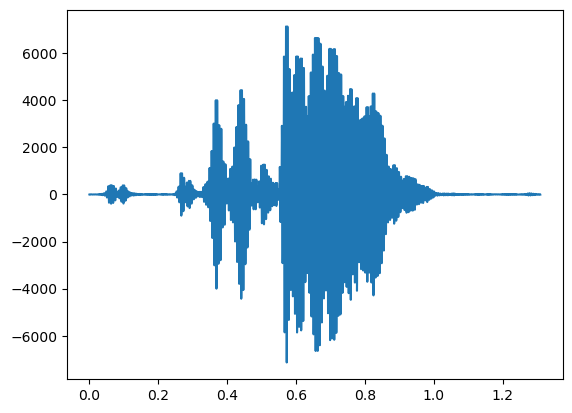

In [59]:
plt.plot(np.arange(len(signal[0]))/sample_rate, signal[0])
# plt.xlim(0.4, 0.42) # show a 20 ms snippet
plt.show()

In [60]:
signal_wav = sum(np.int16(signal))
print(signal_wav)
scipy.io.wavfile.write("reconstructed_sounds/"+input("Name your audio: ")+"-"+input("How many channels?")+"channels_"+input("How many milliseconds of overlap? ")+"millisecondoverlap.wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

[ 0  1  5 ...  3  8 11]
Name your audio: cosmos9
How many channels?22
How many milliseconds of overlap? 6


In [ ]:
# plot all graphs together
times_reconstructed = np.arange(len(signal))/sample_rate
fig, axes = plt.subplots(len(signal), 3, figsize=(10, 15))

columns = [(bandpassed_frequencies_low_to_high, "Band Pass"), (enveloped_frequencies_low_to_high, "Rectified (envelope)"), (signal, "Signal")]

for indx in range(len(signal)):
    for column_indx in range(3):
        low,high = frequency_ranges[indx], frequency_ranges[indx+1]
        axes[indx, column_indx].set_title(f"{columns[column_indx][1]} ({low}-{high} kHz)")
        axes[indx, column_indx].grid(alpha=.5, ls='--')
#         print(columns[column_indx][0][indx])
#         print(len(columns[column_indx][0][indx]))
#         print(len(times_reconstructed))
#         break
        axes[indx, column_indx].plot(times, columns[column_indx][0][indx])
        axes[indx, column_indx].set_ylabel('amplitude')
#     break
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

In [ ]:
# plot one frequency range
times_reconstructed = np.arange(len(signal))/sample_rate
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

columns = [(bandpassed_frequencies_low_to_high, "Band Pass"), (enveloped_frequencies_low_to_high, "Rectified (envelope)"), (signal, "Signal")]

for indx in range(len(signal)):
    for column_indx in range(3):
        low,high = frequency_ranges[indx], frequency_ranges[indx+1]
        axes[column_indx].set_title(f"{columns[column_indx][1]} ({low}-{high} kHz)")
        axes[column_indx].grid(alpha=.5, ls='--')
#         print(columns[column_indx][0][indx])
#         print(len(columns[column_indx][0][indx]))
#         print(len(times_reconstructed))
#         break
        axes[column_indx].plot(times, columns[column_indx][0][indx])
        axes[column_indx].set_ylabel('amplitude')
    break
plt.tight_layout()
plt.show()

### DO NOT JUST GET THE POSITIVE AMPLITUDE. DO "ENVELOPE EXTRACTION"

# Comparing Speech Intelligibility with varying SNR, Noise, Reverb

In [43]:
# learn about this formula
def signaltonoise(sound_data, axis=0, ddof=0):
    sound_data = np.asanyarray(sound_data)
    m = sound_data.mean(axis)
    sd = sound_data.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [44]:
# noise
# Load sample data from a WAV file
noise_file = "noise/train1-54065-A-45.wav"

noise_sample_rate, noise_data = scipy.io.wavfile.read(noise_file)
noised_times = np.arange(len(noise_data))/noise_sample_rate
# data = sum(data.T) # if data is a 2d array (with two channels) 
print(noise_data.shape)

print("sample_rate:", str(noise_sample_rate) + " samples/sec")

(262278,)
sample_rate: 8000 samples/sec


In [ ]:
# # for normalizing sound/equalizing the volume
# from pydub import AudioSegment, effects
# rawsound = AudioSegment.from_file(noise_file, "wav")  
# normalizedsound = effects.normalize(rawsound)  
# normalizedsound.export("./output1.wav", format="wav")

In [45]:
snr_ratio = 7 # i think this is the formula because rms values = amplitude are in decibels

sample_rate, data = scipy.io.wavfile.read(wav_file)
data = noise_data[:len(data)]*(1/snr_ratio)+data
scipy.io.wavfile.write("noised/non_vocoded/noised_"+str(snr_ratio)+wav_file+".wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

In [46]:
# bandpass the data
bandpassed_frequencies_low_to_high = []

for indx in range(0, len(frequency_ranges)-1):
    low, high = frequency_ranges[indx], frequency_ranges[indx+1]
    bandpassed_frequencies_low_to_high.append(bandpass(data, [low, high], sample_rate))
    
# rectify/get the envelope of each channel
enveloped_frequencies_low_to_high = []
for indx in range(len(bandpassed_frequencies_low_to_high)):
    enveloped_frequencies_low_to_high.append(np.abs(bandpassed_frequencies_low_to_high[indx]))
    
# got rms energy with overlap, LEN_TIME_QUANTIZED_MS=8ms i.e. if overlap is 2ms, calculate rms energy for 8 ms at 0s, 2s, 4s, 6s, 8s, ...
# get rms every 8 ms, construct a sinusoid with amplitude = rms energy and frequency = average of the bandpass filter
# sample rate = 48000/s or 384 per 8 ms
# TIP: make sure to use a zero phase filter as a parameter in the bandpass filter
if OVERLAP_MS == 0 or OVERLAP_MS > LEN_TIME_QUANTIZED_MS:
    OVERLAP_MS = LEN_TIME_QUANTIZED_MS

rms_energy_values = []

frame_step = int((sample_rate/1000)*LEN_TIME_QUANTIZED_MS) # the number of values equal to LEN_TIME_QUANTIZED_MS milliseconds. this should give an integer
overlap_step = int((sample_rate/1000)*OVERLAP_MS) # the number of values equal to the millisecond overlap

for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(frequencies[indx:final_indx]**2)))
        indx += overlap_step
        final_indx += overlap_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))

    # generate sinusoid (represents current?)
signal = []

for indx in range(len(frequency_ranges)-1):
    output = []
    min_frequency = frequency_ranges[indx]
    max_frequency = frequency_ranges[indx+1]
    average_frequency = (min_frequency+max_frequency)/2
    ## TODO HERE: get every 8 seconds and its amplitude
    for amplitude in rms_energy_values[indx][:-1]: # do this until the final frame which may not be the max frame length
        output.extend(create_sinusoid(average_frequency, amplitude, OVERLAP_MS/1000))
    output.extend(create_sinusoid(average_frequency, amplitude, (final_frame_length/frame_step)*LEN_TIME_QUANTIZED_MS/1000)) # process the final frame which may not be the max frame length 
    signal.append(np.array(output))
    
signal_wav = sum(np.int16(signal))
_OVERLAP_MS = OVERLAP_MS
if _OVERLAP_MS >= LEN_TIME_QUANTIZED_MS:
    _OVERLAP_MS = 0
scipy.io.wavfile.write("noised/vocoded/"+input("Name your audio: ")+"-"+input("How many channels?")+"channels_"+str(_OVERLAP_MS)+"millisecondoverlap"+str(snr_ratio)+"snr.wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

Name your audio: cosmos
How many channels?22


In [49]:
# CHECK HERE FOR VIDEO TUTORIAL: https://www.youtube.com/watch?v=q63ypxds0cY 

# don't understand this below
# reverb: https://stackoverflow.com/questions/58345278/how-to-add-a-ratio-parameter-to-scipy-signal-convolution-in-python
def addReverb(data, ir_data, ratio=0.1):
    verb = np.abs(ir_data)
    verb = np.multiply(verb, 1.0/np.max(verb)) # make sure the highest value is 1
    verb = np.power(verb, 1.0/ratio) # a higher power makes the reverb die out more quickly
    verbed_data = scipy.signal.convolve(data, verb, method='fft')
    return verbed_data

In [50]:
ir_data = np.genfromtxt('room_impulse_response_simulation.csv', delimiter=',')

In [59]:
ratio = 0.1
reverbed_data = np.int16(addReverb(data, ir_data, ratio))
data = reverbed_data
scipy.io.wavfile.write("reverbed/non_vocoded/reverbed_"+str(ratio)+wav_file+".wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding

In [ ]:
# bandpass the data
bandpassed_frequencies_low_to_high = []

for indx in range(0, len(frequency_ranges)-1):
    low, high = frequency_ranges[indx], frequency_ranges[indx+1]
    bandpassed_frequencies_low_to_high.append(bandpass(data, [low, high], sample_rate))
    
# rectify/get the envelope of each channel
enveloped_frequencies_low_to_high = []
for indx in range(len(bandpassed_frequencies_low_to_high)):
    enveloped_frequencies_low_to_high.append(np.abs(bandpassed_frequencies_low_to_high[indx]))
    
# got rms energy with overlap, LEN_TIME_QUANTIZED_MS=8ms i.e. if overlap is 2ms, calculate rms energy for 8 ms at 0s, 2s, 4s, 6s, 8s, ...
# get rms every 8 ms, construct a sinusoid with amplitude = rms energy and frequency = average of the bandpass filter
# sample rate = 48000/s or 384 per 8 ms
# TIP: make sure to use a zero phase filter as a parameter in the bandpass filter
if OVERLAP_MS == 0 or OVERLAP_MS > LEN_TIME_QUANTIZED_MS:
    OVERLAP_MS = LEN_TIME_QUANTIZED_MS

rms_energy_values = []

frame_step = int((sample_rate/1000)*LEN_TIME_QUANTIZED_MS) # the number of values equal to LEN_TIME_QUANTIZED_MS milliseconds. this should give an integer
overlap_step = int((sample_rate/1000)*OVERLAP_MS) # the number of values equal to the millisecond overlap

for frequencies in enveloped_frequencies_low_to_high:
    rms_list = []
    indx = 0
    final_indx = indx + frame_step
    while final_indx < frequencies.shape[0]:
        rms_list.append(math.sqrt(np.mean(frequencies[indx:final_indx]**2)))
        indx += overlap_step
        final_indx += overlap_step
    final_frame_length = len(frequencies[indx:])
    rms_list.append(math.sqrt(np.mean(frequencies[indx:]**2)))
    rms_energy_values.append(np.array(rms_list))

    # generate sinusoid (represents current?)
signal = []

for indx in range(len(frequency_ranges)-1):
    output = []
    min_frequency = frequency_ranges[indx]
    max_frequency = frequency_ranges[indx+1]
    average_frequency = (min_frequency+max_frequency)/2
    ## TODO HERE: get every 8 seconds and its amplitude
    for amplitude in rms_energy_values[indx][:-1]: # do this until the final frame which may not be the max frame length
        output.extend(create_sinusoid(average_frequency, amplitude, OVERLAP_MS/1000))
    output.extend(create_sinusoid(average_frequency, amplitude, (final_frame_length/frame_step)*LEN_TIME_QUANTIZED_MS/1000)) # process the final frame which may not be the max frame length 
    signal.append(np.array(output))
    
signal_wav = sum(np.int16(signal))
_OVERLAP_MS = OVERLAP_MS
if _OVERLAP_MS >= LEN_TIME_QUANTIZED_MS:
    _OVERLAP_MS = 0
scipy.io.wavfile.write("noised/vocoded/"+input("Name your audio: ")+"-"+input("How many channels?")+"channels_"+str(_OVERLAP_MS)+"millisecondoverlap"+str(ratio)+"snr.wav", sample_rate, signal_wav) # have to transpose signal and combine all channels by adding